# Рекомендация тарифов

В вашем распоряжении данные о поведении клиентов, которые уже перешли на эти тарифы (из проекта курса «Статистический анализ данных»). Нужно построить модель для задачи классификации, которая выберет подходящий тариф. Предобработка данных не понадобится — вы её уже сделали.

Постройте модель с максимально большим значением *accuracy*. Чтобы сдать проект успешно, нужно довести долю правильных ответов по крайней мере до 0.75. Проверьте *accuracy* на тестовой выборке самостоятельно.

### Подключим необходимые библиотеки

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split #для задания тестовой выборки
from sklearn.metrics import accuracy_score #для определения точности

import seaborn as sns

from sklearn.tree import DecisionTreeClassifier #решающее дерево
from sklearn.ensemble import RandomForestClassifier #случайный лес
from sklearn.linear_model import LogisticRegression #логистическая регрессия

## Откройте и изучите файл

### Откроем файл и посмотрим на первые строки

In [2]:
df = pd.read_csv('')
df.head()

,calls,minutes,messages,mb_used,is_ultra
0,40.0,311.90,83.0,19915.42,0
1,85.0,516.75,56.0,22696.96,0
2,77.0,467.66,86.0,21060.45,0
3,106.0,745.53,81.0,8437.39,1
4,66.0,418.74,1.0,14502.75,0


### Посмотрим наличие пропусков

In [3]:
df.isna().sum()

calls       0
minutes     0
messages    0
mb_used     0
is_ultra    0
dtype: int64

Пропусков нет, идем дальше...

In [4]:
df.corr(method='spearman')

,calls,minutes,messages,mb_used,is_ultra
calls,1.000000,0.978684,0.155032,0.253886,0.160549
minutes,0.978684,1.000000,0.153784,0.248818,0.159991
messages,0.155032,0.153784,1.000000,0.141999,0.106537
mb_used,0.253886,0.248818,0.141999,1.000000,0.154989
is_ultra,0.160549,0.159991,0.106537,0.154989,1.000000


/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning

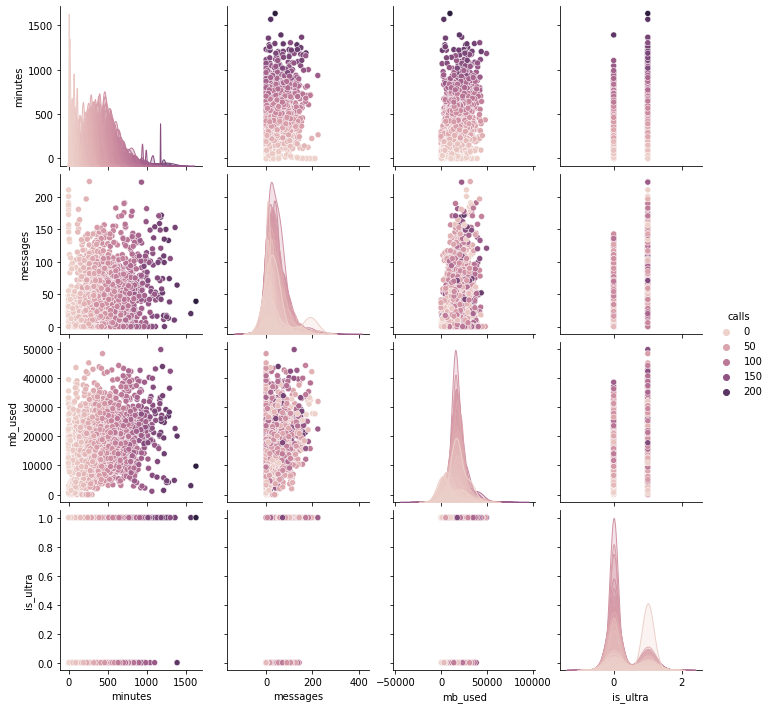

In [5]:
sns.pairplot(df, hue="calls");

## Разбейте данные на выборки

In [6]:
features = df.drop(['is_ultra'], axis=1)
target = df['is_ultra']

features_nf, features_valid, target_nf, target_valid = train_test_split( 
    features, target, test_size=0.2, random_state=13)#в принципе, я думаю, можно было перезаписать признаки и цели
print('Количество строк в валидационной выборке:', target_valid.count(),
      ', что составляет', target_valid.count()/target.count())

features_train, features_test, target_train, target_test = train_test_split(
    features_nf, target_nf, test_size=0.25, random_state=13)
print('Количество строк в тестовой выборке:', target_test.count(),
      ', что составляет', target_test.count()/target.count())

print('Количество строк в тренировочной выборке:', target_train.count(),
      ', что составляет', target_train.count()/target.count())

Количество строк в валидационной выборке: 643 , что составляет 0.2000622277535781
Количество строк в тестовой выборке: 643 , что составляет 0.2000622277535781
Количество строк в тренировочной выборке: 1928 , что составляет 0.5998755444928439


## Исследуйте модели

### Посмотрим на поведедение различных моделей

#### Решающее дерево

In [7]:
best_model1 = None
best_result = 0
best_depth = 0
for depth in range(1,6):
    model1 = DecisionTreeClassifier(random_state=13, max_depth=depth)
    model1.fit(features_train, target_train)
    result = model1.score(features_valid, target_valid)
    if result > best_result:
        best_model1 = model1# сохраните наилучшую модель
        best_result = result#  сохраните наилучшее значение метрики accuracy на валидационных данных
        best_depth = depth

print('Точность наилучшей модели на валидационной выборке равна:', best_result, ', при глубине:', best_depth)
    

Точность наилучшей модели на валидационной выборке равна: 0.8055987558320373 , при глубине: 4


#### Случайный лес

In [8]:
best_model2 = None
best_result = 0
best_depth = 0
best_est = 0
for depth in range(1,11):
    for est in range(1, 11):
        model2 = RandomForestClassifier(random_state=13, max_depth=depth, n_estimators=est)
        model2.fit(features_train, target_train)
        result = model2.score(features_valid, target_valid)
        if result > best_result:
            best_model2 = model2# сохраните наилучшую модель
            best_result = result#  сохраните наилучшее значение метрики accuracy на валидационных данных
            best_depth = depth
            best_est = est

print('Точность наилучшей модели на валидационной выборке равна:', best_result,
      'при количестве "деревьев" и глубине равных соответственно:', best_est, 'и', best_depth)

Точность наилучшей модели на валидационной выборке равна: 0.8180404354587869 при количестве "деревьев" и глубине равных соответственно: 10 и 5


#### Логистическая регрессия

In [9]:
best_model3 = None
best_result = 0
best_iter = 0
for i in range(1,501,33):
    model3 = LogisticRegression(random_state=13, solver='lbfgs', max_iter=i)
    model3.fit(features_train, target_train)
    result = model3.score(features_valid, target_valid)
    if result > best_result:
        best_model3 = model3# сохраните наилучшую модель
        best_result = result#  сохраните наилучшее значение метрики accuracy на валидационных данных
        best_iter = i
print('Точность наилучшей модели на валидационной выборке равна:', best_result,
      'при количестве итераций равном:', best_iter)

/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

Точность наилучшей модели на валидационной выборке равна: 0.7356143079315708 при количестве итераций равном: 100


На валидационной выборке лучшим образом показали себя первые две модели, точность которых была выше 0.8, модель логистической регрессии является наиболее быстрой, что сказывается на ее точности, которая составляет 0.7356 на валидационной выборке.

## Проверьте модель на тестовой выборке

In [10]:
result = model1.score(features_test, target_test)
print('Точность "решающего дерева":', result)
result = model2.score(features_test, target_test)
print('Точность "случайного леса":', result)
result = model3.score(features_test, target_test)
print('Точность логистической регрессии:', result)

Точность "решающего дерева": 0.8429237947122862
Точность "случайного леса": 0.8118195956454122
Точность логистической регрессии: 0.80248833592535


<b>Вывод:</b> Наиболее точной на тестовой выборке оказалась модель "решающего дерера" с accuracy равным 0.84, далее по точности идет модель "случайного леса" - 0.81, и завершающей по точности будет модель "логистической регрессии" - 0.8